In [1]:
import tensorflow as tf
from tensorflow import keras

In [22]:
class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') >= 0.9:
            self.model.stop_training = True


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [3]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test / 255.0
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [16]:
# filters = 64, kernel size = (3, 3)
# it will create 64 filters, that has size 3x3
# input shape = (28, 28, 1) mean image has size (28 x 28), 
# and has only 1 color channel (grayscale image)
# pool_size = (2, 2) mean it will return the max value of each 2x2 square

model = keras.Sequential([
    keras.layers.Conv2D(
        filters=16, 
        kernel_size=(3, 3), 
        activation='relu', 
        input_shape=(28, 28, 1)
    ),
    # keras.layers.MaxPooling2D(
    #     pool_size=(2, 2)
    # ),
    # keras.layers.Conv2D(
    #     filters=64, 
    #     kernel_size=(3, 3), 
    #     activation='relu'
    # ),
    # keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
flatten_4 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 1,386,026
Trainable params: 1,386,026
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
callback = MyCallback()
model.fit(x_train, y_train, epochs=5, callbacks=[callback])

Epoch 1/5


   32/60000 [..............................] - ETA: 14:23 - loss: 0.1050 - acc: 0.9375

  128/60000 [..............................] - ETA: 4:04 - loss: 0.0670 - acc: 0.9688 

  256/60000 [..............................] - ETA: 2:16 - loss: 0.0570 - acc: 0.9766

  384/60000 [..............................] - ETA: 1:40 - loss: 0.0540 - acc: 0.9818

  480/60000 [..............................] - ETA: 1:26 - loss: 0.0639 - acc: 0.9792

  576/60000 [..............................] - ETA: 1:17 - loss: 0.0725 - acc: 0.9722

  672/60000 [..............................] - ETA: 1:11 - loss: 0.0784 - acc: 0.9688

  768/60000 [..............................] - ETA: 1:06 - loss: 0.0729 - acc: 0.9727

  864/60000 [..............................] - ETA: 1:02 - loss: 0.0719 - acc: 0.9734

  960/60000 [..............................] - ETA: 59s - loss: 0.0702 - acc: 0.9740 

 1088/60000 [..............................] - ETA: 55s - loss: 0.0708 - acc: 0.9733

 1184/60000 [..............................] - ETA: 53s - loss: 0.0696 - acc: 0.9738

 1280/60000 [..............................] - ETA: 52s - loss: 0.0663 - acc: 0.9750

 1376/60000 [..............................] - ETA: 50s - loss: 0.0651 - acc: 0.9760

 1472/60000 [..............................] - ETA: 49s - loss: 0.0671 - acc: 0.9762

 1568/60000 [..............................] - ETA: 48s - loss: 0.0699 - acc: 0.9751

 1664/60000 [..............................] - ETA: 47s - loss: 0.0713 - acc: 0.9754

 1760/60000 [..............................] - ETA: 46s - loss: 0.0704 - acc: 0.9761

 1856/60000 [..............................] - ETA: 45s - loss: 0.0751 - acc: 0.9741

 1952/60000 [..............................] - ETA: 44s - loss: 0.0739 - acc: 0.9744

 2048/60000 [>.............................] - ETA: 44s - loss: 0.0720 - acc: 0.9751

 2176/60000 [>.............................] - ETA: 43s - loss: 0.0732 - acc: 0.9743

 2272/60000 [>.............................] - ETA: 42s - loss: 0.0723 - acc: 0.9749

 2400/60000 [>.............................] - ETA: 41s - loss: 0.0717 - acc: 0.9746

 2528/60000 [>.............................] - ETA: 40s - loss: 0.0699 - acc: 0.9755

 2656/60000 [>.............................] - ETA: 40s - loss: 0.0688 - acc: 0.9755

 2752/60000 [>.............................] - ETA: 39s - loss: 0.0690 - acc: 0.9757

 2880/60000 [>.............................] - ETA: 39s - loss: 0.0685 - acc: 0.9764

 3008/60000 [>.............................] - ETA: 38s - loss: 0.0685 - acc: 0.9761

 3136/60000 [>.............................] - ETA: 38s - loss: 0.0674 - acc: 0.9770

 3264/60000 [>.............................] - ETA: 37s - loss: 0.0670 - acc: 0.9767

 3392/60000 [>.............................] - ETA: 37s - loss: 0.0663 - acc: 0.9767

 3520/60000 [>.............................] - ETA: 36s - loss: 0.0655 - acc: 0.9767

 3648/60000 [>.............................] - ETA: 36s - loss: 0.0662 - acc: 0.9767

 3744/60000 [>.............................] - ETA: 35s - loss: 0.0654 - acc: 0.9770

 3840/60000 [>.............................] - ETA: 35s - loss: 0.0659 - acc: 0.9766

 3936/60000 [>.............................] - ETA: 35s - loss: 0.0649 - acc: 0.9771

 4032/60000 [=>............................] - ETA: 35s - loss: 0.0643 - acc: 0.9774

 4128/60000 [=>............................] - ETA: 35s - loss: 0.0632 - acc: 0.9780

 4256/60000 [=>............................] - ETA: 35s - loss: 0.0622 - acc: 0.9784

 4384/60000 [=>............................] - ETA: 34s - loss: 0.0622 - acc: 0.9786

 4512/60000 [=>............................] - ETA: 34s - loss: 0.0620 - acc: 0.9787

 4608/60000 [=>............................] - ETA: 34s - loss: 0.0617 - acc: 0.9787

 4704/60000 [=>............................] - ETA: 34s - loss: 0.0613 - acc: 0.9787

 4800/60000 [=>............................] - ETA: 34s - loss: 0.0607 - acc: 0.9790

 4896/60000 [=>............................] - ETA: 34s - loss: 0.0610 - acc: 0.9790

 4992/60000 [=>............................] - ETA: 34s - loss: 0.0603 - acc: 0.9792

 5088/60000 [=>............................] - ETA: 34s - loss: 0.0618 - acc: 0.9790

 5184/60000 [=>............................] - ETA: 33s - loss: 0.0611 - acc: 0.9794

 5312/60000 [=>............................] - ETA: 33s - loss: 0.0613 - acc: 0.9793

 5440/60000 [=>............................] - ETA: 33s - loss: 0.0613 - acc: 0.9792

 5568/60000 [=>............................] - ETA: 33s - loss: 0.0609 - acc: 0.9793

 5696/60000 [=>............................] - ETA: 32s - loss: 0.0611 - acc: 0.9793

 5824/60000 [=>............................] - ETA: 32s - loss: 0.0613 - acc: 0.9792

 5920/60000 [=>............................] - ETA: 32s - loss: 0.0617 - acc: 0.9791

 6048/60000 [==>...........................] - ETA: 32s - loss: 0.0632 - acc: 0.9783

 6176/60000 [==>...........................] - ETA: 32s - loss: 0.0632 - acc: 0.9781

 6304/60000 [==>...........................] - ETA: 31s - loss: 0.0629 - acc: 0.9783

 6432/60000 [==>...........................] - ETA: 31s - loss: 0.0623 - acc: 0.9784

 6560/60000 [==>...........................] - ETA: 31s - loss: 0.0635 - acc: 0.9777

 6688/60000 [==>...........................] - ETA: 31s - loss: 0.0632 - acc: 0.9779

 6816/60000 [==>...........................] - ETA: 31s - loss: 0.0630 - acc: 0.9778

 6944/60000 [==>...........................] - ETA: 30s - loss: 0.0640 - acc: 0.9774

 7072/60000 [==>...........................] - ETA: 30s - loss: 0.0634 - acc: 0.9777

 7200/60000 [==>...........................] - ETA: 30s - loss: 0.0637 - acc: 0.9776

 7328/60000 [==>...........................] - ETA: 30s - loss: 0.0634 - acc: 0.9778

 7456/60000 [==>...........................] - ETA: 30s - loss: 0.0631 - acc: 0.9777

 7584/60000 [==>...........................] - ETA: 30s - loss: 0.0634 - acc: 0.9777

 7712/60000 [==>...........................] - ETA: 29s - loss: 0.0635 - acc: 0.9777

 7840/60000 [==>...........................] - ETA: 29s - loss: 0.0633 - acc: 0.9779

 7968/60000 [==>...........................] - ETA: 29s - loss: 0.0637 - acc: 0.9778

 8096/60000 [===>..........................] - ETA: 29s - loss: 0.0654 - acc: 0.9771

 8224/60000 [===>..........................] - ETA: 29s - loss: 0.0654 - acc: 0.9771

 8352/60000 [===>..........................] - ETA: 29s - loss: 0.0659 - acc: 0.9768

 8480/60000 [===>..........................] - ETA: 28s - loss: 0.0657 - acc: 0.9769

 8608/60000 [===>..........................] - ETA: 28s - loss: 0.0661 - acc: 0.9764

 8736/60000 [===>..........................] - ETA: 28s - loss: 0.0658 - acc: 0.9765

 8864/60000 [===>..........................] - ETA: 28s - loss: 0.0662 - acc: 0.9763

 8992/60000 [===>..........................] - ETA: 28s - loss: 0.0665 - acc: 0.9761

 9120/60000 [===>..........................] - ETA: 28s - loss: 0.0668 - acc: 0.9760

 9248/60000 [===>..........................] - ETA: 28s - loss: 0.0672 - acc: 0.9759

 9376/60000 [===>..........................] - ETA: 27s - loss: 0.0681 - acc: 0.9755

 9504/60000 [===>..........................] - ETA: 27s - loss: 0.0681 - acc: 0.9753

 9632/60000 [===>..........................] - ETA: 27s - loss: 0.0684 - acc: 0.9753

 9760/60000 [===>..........................] - ETA: 27s - loss: 0.0682 - acc: 0.9754

 9888/60000 [===>..........................] - ETA: 27s - loss: 0.0682 - acc: 0.9754

10016/60000 [====>.........................] - ETA: 27s - loss: 0.0682 - acc: 0.9755

10144/60000 [====>.........................] - ETA: 27s - loss: 0.0688 - acc: 0.9752

10272/60000 [====>.........................] - ETA: 27s - loss: 0.0693 - acc: 0.9750

10368/60000 [====>.........................] - ETA: 27s - loss: 0.0690 - acc: 0.9751

10496/60000 [====>.........................] - ETA: 26s - loss: 0.0690 - acc: 0.9749

10624/60000 [====>.........................] - ETA: 26s - loss: 0.0701 - acc: 0.9748

10752/60000 [====>.........................] - ETA: 26s - loss: 0.0704 - acc: 0.9747

10880/60000 [====>.........................] - ETA: 26s - loss: 0.0699 - acc: 0.9749

11008/60000 [====>.........................] - ETA: 26s - loss: 0.0698 - acc: 0.9750

11136/60000 [====>.........................] - ETA: 26s - loss: 0.0697 - acc: 0.9749

11264/60000 [====>.........................] - ETA: 26s - loss: 0.0695 - acc: 0.9751

11392/60000 [====>.........................] - ETA: 26s - loss: 0.0693 - acc: 0.9752

11520/60000 [====>.........................] - ETA: 26s - loss: 0.0689 - acc: 0.9753

11648/60000 [====>.........................] - ETA: 25s - loss: 0.0688 - acc: 0.9754

11776/60000 [====>.........................] - ETA: 25s - loss: 0.0693 - acc: 0.9753

11904/60000 [====>.........................] - ETA: 25s - loss: 0.0694 - acc: 0.9753

12032/60000 [=====>........................] - ETA: 25s - loss: 0.0690 - acc: 0.9754

12160/60000 [=====>........................] - ETA: 25s - loss: 0.0688 - acc: 0.9755

12288/60000 [=====>........................] - ETA: 25s - loss: 0.0687 - acc: 0.9755

12416/60000 [=====>........................] - ETA: 25s - loss: 0.0687 - acc: 0.9754

12544/60000 [=====>........................] - ETA: 25s - loss: 0.0685 - acc: 0.9754

12672/60000 [=====>........................] - ETA: 25s - loss: 0.0684 - acc: 0.9754

12800/60000 [=====>........................] - ETA: 25s - loss: 0.0681 - acc: 0.9755

12928/60000 [=====>........................] - ETA: 24s - loss: 0.0682 - acc: 0.9753

13056/60000 [=====>........................] - ETA: 24s - loss: 0.0689 - acc: 0.9753

13184/60000 [=====>........................] - ETA: 24s - loss: 0.0687 - acc: 0.9754

13312/60000 [=====>........................] - ETA: 24s - loss: 0.0692 - acc: 0.9753

13440/60000 [=====>........................] - ETA: 24s - loss: 0.0689 - acc: 0.9754

13568/60000 [=====>........................] - ETA: 24s - loss: 0.0690 - acc: 0.9752

13696/60000 [=====>........................] - ETA: 24s - loss: 0.0691 - acc: 0.9751

13824/60000 [=====>........................] - ETA: 24s - loss: 0.0691 - acc: 0.9750

13952/60000 [=====>........................] - ETA: 24s - loss: 0.0690 - acc: 0.9751

14080/60000 [======>.......................] - ETA: 24s - loss: 0.0690 - acc: 0.9752

14208/60000 [======>.......................] - ETA: 23s - loss: 0.0694 - acc: 0.9751

14336/60000 [======>.......................] - ETA: 23s - loss: 0.0695 - acc: 0.9750

14464/60000 [======>.......................] - ETA: 23s - loss: 0.0693 - acc: 0.9751

14592/60000 [======>.......................] - ETA: 23s - loss: 0.0691 - acc: 0.9751

14720/60000 [======>.......................] - ETA: 23s - loss: 0.0688 - acc: 0.9753

14848/60000 [======>.......................] - ETA: 23s - loss: 0.0685 - acc: 0.9754

14976/60000 [======>.......................] - ETA: 23s - loss: 0.0685 - acc: 0.9754

15104/60000 [======>.......................] - ETA: 23s - loss: 0.0687 - acc: 0.9753

15232/60000 [======>.......................] - ETA: 23s - loss: 0.0688 - acc: 0.9754

15360/60000 [======>.......................] - ETA: 23s - loss: 0.0686 - acc: 0.9755

15488/60000 [======>.......................] - ETA: 23s - loss: 0.0685 - acc: 0.9755

15616/60000 [======>.......................] - ETA: 23s - loss: 0.0685 - acc: 0.9754

15744/60000 [======>.......................] - ETA: 22s - loss: 0.0684 - acc: 0.9755

15872/60000 [======>.......................] - ETA: 22s - loss: 0.0683 - acc: 0.9755

16000/60000 [=======>......................] - ETA: 22s - loss: 0.0683 - acc: 0.9754

16128/60000 [=======>......................] - ETA: 22s - loss: 0.0682 - acc: 0.9754

16256/60000 [=======>......................] - ETA: 22s - loss: 0.0683 - acc: 0.9755

16384/60000 [=======>......................] - ETA: 22s - loss: 0.0683 - acc: 0.9755

16512/60000 [=======>......................] - ETA: 22s - loss: 0.0688 - acc: 0.9752

16640/60000 [=======>......................] - ETA: 22s - loss: 0.0690 - acc: 0.9750

16768/60000 [=======>......................] - ETA: 22s - loss: 0.0688 - acc: 0.9750

16896/60000 [=======>......................] - ETA: 22s - loss: 0.0688 - acc: 0.9751

17024/60000 [=======>......................] - ETA: 22s - loss: 0.0687 - acc: 0.9752

17152/60000 [=======>......................] - ETA: 22s - loss: 0.0687 - acc: 0.9752

17280/60000 [=======>......................] - ETA: 21s - loss: 0.0688 - acc: 0.9752

17408/60000 [=======>......................] - ETA: 21s - loss: 0.0686 - acc: 0.9754

17536/60000 [=======>......................] - ETA: 21s - loss: 0.0686 - acc: 0.9754

17664/60000 [=======>......................] - ETA: 21s - loss: 0.0683 - acc: 0.9755

17792/60000 [=======>......................] - ETA: 21s - loss: 0.0682 - acc: 0.9756

17920/60000 [=======>......................] - ETA: 21s - loss: 0.0681 - acc: 0.9755

18048/60000 [========>.....................] - ETA: 21s - loss: 0.0682 - acc: 0.9755

18176/60000 [========>.....................] - ETA: 21s - loss: 0.0683 - acc: 0.9753

18304/60000 [========>.....................] - ETA: 21s - loss: 0.0685 - acc: 0.9752

18432/60000 [========>.....................] - ETA: 21s - loss: 0.0685 - acc: 0.9752

18560/60000 [========>.....................] - ETA: 21s - loss: 0.0685 - acc: 0.9752

18688/60000 [========>.....................] - ETA: 21s - loss: 0.0686 - acc: 0.9751

18816/60000 [========>.....................] - ETA: 20s - loss: 0.0688 - acc: 0.9749

18944/60000 [========>.....................] - ETA: 20s - loss: 0.0686 - acc: 0.9749

19072/60000 [========>.....................] - ETA: 20s - loss: 0.0686 - acc: 0.9749

19200/60000 [========>.....................] - ETA: 20s - loss: 0.0688 - acc: 0.9749

19328/60000 [========>.....................] - ETA: 20s - loss: 0.0688 - acc: 0.9750

19456/60000 [========>.....................] - ETA: 20s - loss: 0.0686 - acc: 0.9751

19584/60000 [========>.....................] - ETA: 20s - loss: 0.0688 - acc: 0.9751

19712/60000 [========>.....................] - ETA: 20s - loss: 0.0688 - acc: 0.9751

19840/60000 [========>.....................] - ETA: 20s - loss: 0.0688 - acc: 0.9752

19968/60000 [========>.....................] - ETA: 20s - loss: 0.0686 - acc: 0.9753

20096/60000 [=========>....................] - ETA: 20s - loss: 0.0686 - acc: 0.9752

20224/60000 [=========>....................] - ETA: 20s - loss: 0.0693 - acc: 0.9749

20352/60000 [=========>....................] - ETA: 20s - loss: 0.0693 - acc: 0.9748

20480/60000 [=========>....................] - ETA: 20s - loss: 0.0698 - acc: 0.9747

20608/60000 [=========>....................] - ETA: 19s - loss: 0.0696 - acc: 0.9746

20736/60000 [=========>....................] - ETA: 19s - loss: 0.0695 - acc: 0.9747

20864/60000 [=========>....................] - ETA: 19s - loss: 0.0697 - acc: 0.9746

20992/60000 [=========>....................] - ETA: 19s - loss: 0.0696 - acc: 0.9747

21120/60000 [=========>....................] - ETA: 19s - loss: 0.0697 - acc: 0.9746

21248/60000 [=========>....................] - ETA: 19s - loss: 0.0703 - acc: 0.9744

21376/60000 [=========>....................] - ETA: 19s - loss: 0.0703 - acc: 0.9745

21504/60000 [=========>....................] - ETA: 19s - loss: 0.0703 - acc: 0.9745

21632/60000 [=========>....................] - ETA: 19s - loss: 0.0701 - acc: 0.9745

21760/60000 [=========>....................] - ETA: 19s - loss: 0.0701 - acc: 0.9745

21888/60000 [=========>....................] - ETA: 19s - loss: 0.0702 - acc: 0.9745

22016/60000 [==========>...................] - ETA: 19s - loss: 0.0702 - acc: 0.9744

22144/60000 [==========>...................] - ETA: 19s - loss: 0.0702 - acc: 0.9745

22272/60000 [==========>...................] - ETA: 18s - loss: 0.0701 - acc: 0.9745

22400/60000 [==========>...................] - ETA: 18s - loss: 0.0700 - acc: 0.9745

22528/60000 [==========>...................] - ETA: 18s - loss: 0.0701 - acc: 0.9745

22656/60000 [==========>...................] - ETA: 18s - loss: 0.0700 - acc: 0.9744

22784/60000 [==========>...................] - ETA: 18s - loss: 0.0703 - acc: 0.9743

22912/60000 [==========>...................] - ETA: 18s - loss: 0.0707 - acc: 0.9743

23040/60000 [==========>...................] - ETA: 18s - loss: 0.0710 - acc: 0.9742

23168/60000 [==========>...................] - ETA: 18s - loss: 0.0709 - acc: 0.9742

23296/60000 [==========>...................] - ETA: 18s - loss: 0.0707 - acc: 0.9743

23424/60000 [==========>...................] - ETA: 18s - loss: 0.0705 - acc: 0.9744

23552/60000 [==========>...................] - ETA: 18s - loss: 0.0707 - acc: 0.9744

23680/60000 [==========>...................] - ETA: 18s - loss: 0.0708 - acc: 0.9742

23808/60000 [==========>...................] - ETA: 18s - loss: 0.0707 - acc: 0.9743

23936/60000 [==========>...................] - ETA: 18s - loss: 0.0706 - acc: 0.9743

24064/60000 [===========>..................] - ETA: 17s - loss: 0.0703 - acc: 0.9745

24192/60000 [===========>..................] - ETA: 17s - loss: 0.0703 - acc: 0.9745

24288/60000 [===========>..................] - ETA: 17s - loss: 0.0703 - acc: 0.9745

24352/60000 [===========>..................] - ETA: 17s - loss: 0.0702 - acc: 0.9745

24416/60000 [===========>..................] - ETA: 17s - loss: 0.0701 - acc: 0.9745

24512/60000 [===========>..................] - ETA: 17s - loss: 0.0702 - acc: 0.9744

24608/60000 [===========>..................] - ETA: 17s - loss: 0.0704 - acc: 0.9744

24736/60000 [===========>..................] - ETA: 17s - loss: 0.0704 - acc: 0.9744

24864/60000 [===========>..................] - ETA: 17s - loss: 0.0702 - acc: 0.9744

24960/60000 [===========>..................] - ETA: 17s - loss: 0.0701 - acc: 0.9744

25088/60000 [===========>..................] - ETA: 17s - loss: 0.0699 - acc: 0.9745

25216/60000 [===========>..................] - ETA: 17s - loss: 0.0699 - acc: 0.9745

25312/60000 [===========>..................] - ETA: 17s - loss: 0.0700 - acc: 0.9744

25440/60000 [===========>..................] - ETA: 17s - loss: 0.0702 - acc: 0.9744

25568/60000 [===========>..................] - ETA: 17s - loss: 0.0703 - acc: 0.9744

25696/60000 [===========>..................] - ETA: 17s - loss: 0.0704 - acc: 0.9743

25824/60000 [===========>..................] - ETA: 17s - loss: 0.0703 - acc: 0.9742

25952/60000 [===========>..................] - ETA: 17s - loss: 0.0705 - acc: 0.9741

26080/60000 [============>.................] - ETA: 17s - loss: 0.0704 - acc: 0.9742

26208/60000 [============>.................] - ETA: 16s - loss: 0.0703 - acc: 0.9742

26336/60000 [============>.................] - ETA: 16s - loss: 0.0703 - acc: 0.9742

26464/60000 [============>.................] - ETA: 16s - loss: 0.0701 - acc: 0.9743

26592/60000 [============>.................] - ETA: 16s - loss: 0.0701 - acc: 0.9742

26720/60000 [============>.................] - ETA: 16s - loss: 0.0701 - acc: 0.9742

26848/60000 [============>.................] - ETA: 16s - loss: 0.0701 - acc: 0.9742

26976/60000 [============>.................] - ETA: 16s - loss: 0.0702 - acc: 0.9741

27104/60000 [============>.................] - ETA: 16s - loss: 0.0699 - acc: 0.9742

27232/60000 [============>.................] - ETA: 16s - loss: 0.0698 - acc: 0.9743

27360/60000 [============>.................] - ETA: 16s - loss: 0.0700 - acc: 0.9743

27488/60000 [============>.................] - ETA: 16s - loss: 0.0701 - acc: 0.9743

27584/60000 [============>.................] - ETA: 16s - loss: 0.0700 - acc: 0.9743

27680/60000 [============>.................] - ETA: 16s - loss: 0.0700 - acc: 0.9743

27776/60000 [============>.................] - ETA: 16s - loss: 0.0699 - acc: 0.9743

27872/60000 [============>.................] - ETA: 16s - loss: 0.0701 - acc: 0.9742

27968/60000 [============>.................] - ETA: 16s - loss: 0.0701 - acc: 0.9742

28064/60000 [=============>................] - ETA: 16s - loss: 0.0700 - acc: 0.9742

28160/60000 [=============>................] - ETA: 16s - loss: 0.0699 - acc: 0.9742



28256/60000 [=============>................] - ETA: 16s - loss: 0.0699 - acc: 0.9742

28352/60000 [=============>................] - ETA: 15s - loss: 0.0698 - acc: 0.9743

28448/60000 [=============>................] - ETA: 15s - loss: 0.0698 - acc: 0.9743

28544/60000 [=============>................] - ETA: 15s - loss: 0.0697 - acc: 0.9744

28640/60000 [=============>................] - ETA: 15s - loss: 0.0696 - acc: 0.9744

28736/60000 [=============>................] - ETA: 15s - loss: 0.0696 - acc: 0.9745

28800/60000 [=============>................] - ETA: 15s - loss: 0.0695 - acc: 0.9744



28832/60000 [=============>................] - ETA: 15s - loss: 0.0696 - acc: 0.9744

28928/60000 [=============>................] - ETA: 15s - loss: 0.0695 - acc: 0.9744

28992/60000 [=============>................] - ETA: 15s - loss: 0.0695 - acc: 0.9744

29056/60000 [=============>................] - ETA: 15s - loss: 0.0697 - acc: 0.9743

29088/60000 [=============>................] - ETA: 15s - loss: 0.0699 - acc: 0.9742

29184/60000 [=============>................] - ETA: 15s - loss: 0.0699 - acc: 0.9742

29280/60000 [=============>................] - ETA: 15s - loss: 0.0700 - acc: 0.9742

29376/60000 [=============>................] - ETA: 15s - loss: 0.0699 - acc: 0.9742

29472/60000 [=============>................] - ETA: 15s - loss: 0.0698 - acc: 0.9742

29568/60000 [=============>................] - ETA: 15s - loss: 0.0697 - acc: 0.9742

29664/60000 [=============>................] - ETA: 15s - loss: 0.0695 - acc: 0.9743

29760/60000 [=============>................] - ETA: 15s - loss: 0.0695 - acc: 0.9743

29856/60000 [=============>................] - ETA: 15s - loss: 0.0694 - acc: 0.9743

29984/60000 [=============>................] - ETA: 15s - loss: 0.0695 - acc: 0.9743

30112/60000 [==============>...............] - ETA: 15s - loss: 0.0697 - acc: 0.9742

30240/60000 [==============>...............] - ETA: 15s - loss: 0.0695 - acc: 0.9743

30368/60000 [==============>...............] - ETA: 15s - loss: 0.0696 - acc: 0.9742

30432/60000 [==============>...............] - ETA: 15s - loss: 0.0696 - acc: 0.9742

30528/60000 [==============>...............] - ETA: 15s - loss: 0.0697 - acc: 0.9742

30624/60000 [==============>...............] - ETA: 15s - loss: 0.0698 - acc: 0.9741

30720/60000 [==============>...............] - ETA: 15s - loss: 0.0697 - acc: 0.9741

30816/60000 [==============>...............] - ETA: 15s - loss: 0.0698 - acc: 0.9741

30944/60000 [==============>...............] - ETA: 15s - loss: 0.0698 - acc: 0.9741

31072/60000 [==============>...............] - ETA: 14s - loss: 0.0696 - acc: 0.9742

31168/60000 [==============>...............] - ETA: 14s - loss: 0.0695 - acc: 0.9743

31264/60000 [==============>...............] - ETA: 14s - loss: 0.0694 - acc: 0.9743

31328/60000 [==============>...............] - ETA: 14s - loss: 0.0694 - acc: 0.9743

31392/60000 [==============>...............] - ETA: 14s - loss: 0.0696 - acc: 0.9742

31488/60000 [==============>...............] - ETA: 14s - loss: 0.0696 - acc: 0.9741

31584/60000 [==============>...............] - ETA: 14s - loss: 0.0696 - acc: 0.9742

31680/60000 [==============>...............] - ETA: 14s - loss: 0.0695 - acc: 0.9742

31776/60000 [==============>...............] - ETA: 14s - loss: 0.0695 - acc: 0.9743

31872/60000 [==============>...............] - ETA: 14s - loss: 0.0694 - acc: 0.9743

31936/60000 [==============>...............] - ETA: 14s - loss: 0.0694 - acc: 0.9744

32032/60000 [===============>..............] - ETA: 14s - loss: 0.0692 - acc: 0.9744

32096/60000 [===============>..............] - ETA: 14s - loss: 0.0694 - acc: 0.9744

32192/60000 [===============>..............] - ETA: 14s - loss: 0.0696 - acc: 0.9742

32288/60000 [===============>..............] - ETA: 14s - loss: 0.0697 - acc: 0.9742

32384/60000 [===============>..............] - ETA: 14s - loss: 0.0698 - acc: 0.9742

32480/60000 [===============>..............] - ETA: 14s - loss: 0.0697 - acc: 0.9742

32576/60000 [===============>..............] - ETA: 14s - loss: 0.0698 - acc: 0.9742

32672/60000 [===============>..............] - ETA: 14s - loss: 0.0696 - acc: 0.9743

32768/60000 [===============>..............] - ETA: 14s - loss: 0.0696 - acc: 0.9742

32832/60000 [===============>..............] - ETA: 14s - loss: 0.0696 - acc: 0.9742

32928/60000 [===============>..............] - ETA: 14s - loss: 0.0697 - acc: 0.9742

33024/60000 [===============>..............] - ETA: 14s - loss: 0.0696 - acc: 0.9742

33120/60000 [===============>..............] - ETA: 14s - loss: 0.0697 - acc: 0.9742

33216/60000 [===============>..............] - ETA: 14s - loss: 0.0697 - acc: 0.9742

33312/60000 [===============>..............] - ETA: 14s - loss: 0.0696 - acc: 0.9743

33408/60000 [===============>..............] - ETA: 14s - loss: 0.0695 - acc: 0.9743

33536/60000 [===============>..............] - ETA: 14s - loss: 0.0695 - acc: 0.9743

33664/60000 [===============>..............] - ETA: 13s - loss: 0.0694 - acc: 0.9744

33792/60000 [===============>..............] - ETA: 13s - loss: 0.0694 - acc: 0.9744

33920/60000 [===============>..............] - ETA: 13s - loss: 0.0693 - acc: 0.9744

34048/60000 [================>.............] - ETA: 13s - loss: 0.0692 - acc: 0.9744

34176/60000 [================>.............] - ETA: 13s - loss: 0.0693 - acc: 0.9744

34304/60000 [================>.............] - ETA: 13s - loss: 0.0693 - acc: 0.9744

34432/60000 [================>.............] - ETA: 13s - loss: 0.0692 - acc: 0.9744

34560/60000 [================>.............] - ETA: 13s - loss: 0.0693 - acc: 0.9744

34688/60000 [================>.............] - ETA: 13s - loss: 0.0694 - acc: 0.9744

34784/60000 [================>.............] - ETA: 13s - loss: 0.0695 - acc: 0.9744

34880/60000 [================>.............] - ETA: 13s - loss: 0.0695 - acc: 0.9743

34976/60000 [================>.............] - ETA: 13s - loss: 0.0694 - acc: 0.9744

35104/60000 [================>.............] - ETA: 13s - loss: 0.0696 - acc: 0.9743

35232/60000 [================>.............] - ETA: 13s - loss: 0.0697 - acc: 0.9743

35328/60000 [================>.............] - ETA: 13s - loss: 0.0696 - acc: 0.9743

35456/60000 [================>.............] - ETA: 12s - loss: 0.0697 - acc: 0.9743

35552/60000 [================>.............] - ETA: 12s - loss: 0.0697 - acc: 0.9743

35680/60000 [================>.............] - ETA: 12s - loss: 0.0698 - acc: 0.9743

35776/60000 [================>.............] - ETA: 12s - loss: 0.0699 - acc: 0.9743

35872/60000 [================>.............] - ETA: 12s - loss: 0.0698 - acc: 0.9743

35968/60000 [================>.............] - ETA: 12s - loss: 0.0699 - acc: 0.9743

36096/60000 [=================>............] - ETA: 12s - loss: 0.0699 - acc: 0.9743

36192/60000 [=================>............] - ETA: 12s - loss: 0.0698 - acc: 0.9743

36320/60000 [=================>............] - ETA: 12s - loss: 0.0697 - acc: 0.9744

36448/60000 [=================>............] - ETA: 12s - loss: 0.0697 - acc: 0.9744

36544/60000 [=================>............] - ETA: 12s - loss: 0.0696 - acc: 0.9744

36672/60000 [=================>............] - ETA: 12s - loss: 0.0696 - acc: 0.9744

36768/60000 [=================>............] - ETA: 12s - loss: 0.0699 - acc: 0.9743

36896/60000 [=================>............] - ETA: 12s - loss: 0.0700 - acc: 0.9743

37024/60000 [=================>............] - ETA: 12s - loss: 0.0699 - acc: 0.9743

37152/60000 [=================>............] - ETA: 12s - loss: 0.0700 - acc: 0.9743

37280/60000 [=================>............] - ETA: 11s - loss: 0.0699 - acc: 0.9744

37408/60000 [=================>............] - ETA: 11s - loss: 0.0699 - acc: 0.9745

37536/60000 [=================>............] - ETA: 11s - loss: 0.0698 - acc: 0.9745

37664/60000 [=================>............] - ETA: 11s - loss: 0.0697 - acc: 0.9745

37760/60000 [=================>............] - ETA: 11s - loss: 0.0697 - acc: 0.9745

37888/60000 [=================>............] - ETA: 11s - loss: 0.0699 - acc: 0.9744

38016/60000 [==================>...........] - ETA: 11s - loss: 0.0699 - acc: 0.9745

38144/60000 [==================>...........] - ETA: 11s - loss: 0.0699 - acc: 0.9744

38240/60000 [==================>...........] - ETA: 11s - loss: 0.0700 - acc: 0.9744

38336/60000 [==================>...........] - ETA: 11s - loss: 0.0699 - acc: 0.9744

38464/60000 [==================>...........] - ETA: 11s - loss: 0.0699 - acc: 0.9744

38592/60000 [==================>...........] - ETA: 11s - loss: 0.0699 - acc: 0.9744

38720/60000 [==================>...........] - ETA: 11s - loss: 0.0699 - acc: 0.9744

38848/60000 [==================>...........] - ETA: 11s - loss: 0.0699 - acc: 0.9744

38976/60000 [==================>...........] - ETA: 11s - loss: 0.0699 - acc: 0.9744

39104/60000 [==================>...........] - ETA: 10s - loss: 0.0698 - acc: 0.9744

39232/60000 [==================>...........] - ETA: 10s - loss: 0.0699 - acc: 0.9744

39360/60000 [==================>...........] - ETA: 10s - loss: 0.0699 - acc: 0.9744

39488/60000 [==================>...........] - ETA: 10s - loss: 0.0699 - acc: 0.9744

39616/60000 [==================>...........] - ETA: 10s - loss: 0.0699 - acc: 0.9744

39744/60000 [==================>...........] - ETA: 10s - loss: 0.0698 - acc: 0.9744

39872/60000 [==================>...........] - ETA: 10s - loss: 0.0699 - acc: 0.9743

40000/60000 [===================>..........] - ETA: 10s - loss: 0.0701 - acc: 0.9742

40128/60000 [===================>..........] - ETA: 10s - loss: 0.0701 - acc: 0.9743

40256/60000 [===================>..........] - ETA: 10s - loss: 0.0701 - acc: 0.9743

40384/60000 [===================>..........] - ETA: 10s - loss: 0.0700 - acc: 0.9743

40512/60000 [===================>..........] - ETA: 10s - loss: 0.0699 - acc: 0.9744

40640/60000 [===================>..........] - ETA: 10s - loss: 0.0701 - acc: 0.9743

40768/60000 [===================>..........] - ETA: 10s - loss: 0.0702 - acc: 0.9742

40896/60000 [===================>..........] - ETA: 10s - loss: 0.0701 - acc: 0.9742

41024/60000 [===================>..........] - ETA: 9s - loss: 0.0702 - acc: 0.9742 

41120/60000 [===================>..........] - ETA: 9s - loss: 0.0702 - acc: 0.9742

41216/60000 [===================>..........] - ETA: 9s - loss: 0.0703 - acc: 0.9742

41344/60000 [===================>..........] - ETA: 9s - loss: 0.0703 - acc: 0.9742

41440/60000 [===================>..........] - ETA: 9s - loss: 0.0702 - acc: 0.9742

41568/60000 [===================>..........] - ETA: 9s - loss: 0.0703 - acc: 0.9742

41696/60000 [===================>..........] - ETA: 9s - loss: 0.0702 - acc: 0.9742

41792/60000 [===================>..........] - ETA: 9s - loss: 0.0703 - acc: 0.9742

41920/60000 [===================>..........] - ETA: 9s - loss: 0.0703 - acc: 0.9742

42048/60000 [====================>.........] - ETA: 9s - loss: 0.0703 - acc: 0.9742

42176/60000 [====================>.........] - ETA: 9s - loss: 0.0703 - acc: 0.9742

42304/60000 [====================>.........] - ETA: 9s - loss: 0.0703 - acc: 0.9742

42432/60000 [====================>.........] - ETA: 9s - loss: 0.0702 - acc: 0.9742

42560/60000 [====================>.........] - ETA: 9s - loss: 0.0701 - acc: 0.9742

42688/60000 [====================>.........] - ETA: 9s - loss: 0.0701 - acc: 0.9742

42816/60000 [====================>.........] - ETA: 8s - loss: 0.0701 - acc: 0.9743

42944/60000 [====================>.........] - ETA: 8s - loss: 0.0703 - acc: 0.9742

43072/60000 [====================>.........] - ETA: 8s - loss: 0.0702 - acc: 0.9743

43200/60000 [====================>.........] - ETA: 8s - loss: 0.0704 - acc: 0.9742

43328/60000 [====================>.........] - ETA: 8s - loss: 0.0706 - acc: 0.9741

43456/60000 [====================>.........] - ETA: 8s - loss: 0.0709 - acc: 0.9741

43584/60000 [====================>.........] - ETA: 8s - loss: 0.0709 - acc: 0.9740

43712/60000 [====================>.........] - ETA: 8s - loss: 0.0710 - acc: 0.9740

43840/60000 [====================>.........] - ETA: 8s - loss: 0.0710 - acc: 0.9740

43968/60000 [====================>.........] - ETA: 8s - loss: 0.0709 - acc: 0.9741

44096/60000 [=====================>........] - ETA: 8s - loss: 0.0709 - acc: 0.9741

44192/60000 [=====================>........] - ETA: 8s - loss: 0.0709 - acc: 0.9741

44320/60000 [=====================>........] - ETA: 8s - loss: 0.0710 - acc: 0.9740

44448/60000 [=====================>........] - ETA: 8s - loss: 0.0709 - acc: 0.9740

44576/60000 [=====================>........] - ETA: 8s - loss: 0.0710 - acc: 0.9740

44704/60000 [=====================>........] - ETA: 7s - loss: 0.0710 - acc: 0.9740

44832/60000 [=====================>........] - ETA: 7s - loss: 0.0712 - acc: 0.9740

44960/60000 [=====================>........] - ETA: 7s - loss: 0.0712 - acc: 0.9740

45088/60000 [=====================>........] - ETA: 7s - loss: 0.0713 - acc: 0.9740

45216/60000 [=====================>........] - ETA: 7s - loss: 0.0713 - acc: 0.9740

45344/60000 [=====================>........] - ETA: 7s - loss: 0.0712 - acc: 0.9741

45472/60000 [=====================>........] - ETA: 7s - loss: 0.0711 - acc: 0.9740

45600/60000 [=====================>........] - ETA: 7s - loss: 0.0712 - acc: 0.9740

45728/60000 [=====================>........] - ETA: 7s - loss: 0.0712 - acc: 0.9740

45856/60000 [=====================>........] - ETA: 7s - loss: 0.0712 - acc: 0.9740

45984/60000 [=====================>........] - ETA: 7s - loss: 0.0712 - acc: 0.9741

46112/60000 [======================>.......] - ETA: 7s - loss: 0.0710 - acc: 0.9741

46240/60000 [======================>.......] - ETA: 7s - loss: 0.0711 - acc: 0.9741

46368/60000 [======================>.......] - ETA: 7s - loss: 0.0711 - acc: 0.9741

46496/60000 [======================>.......] - ETA: 7s - loss: 0.0712 - acc: 0.9741

46624/60000 [======================>.......] - ETA: 6s - loss: 0.0714 - acc: 0.9740

46720/60000 [======================>.......] - ETA: 6s - loss: 0.0714 - acc: 0.9740

46848/60000 [======================>.......] - ETA: 6s - loss: 0.0714 - acc: 0.9740

46976/60000 [======================>.......] - ETA: 6s - loss: 0.0714 - acc: 0.9739

47104/60000 [======================>.......] - ETA: 6s - loss: 0.0714 - acc: 0.9740

47232/60000 [======================>.......] - ETA: 6s - loss: 0.0714 - acc: 0.9740

47360/60000 [======================>.......] - ETA: 6s - loss: 0.0714 - acc: 0.9740

47488/60000 [======================>.......] - ETA: 6s - loss: 0.0715 - acc: 0.9739

47616/60000 [======================>.......] - ETA: 6s - loss: 0.0715 - acc: 0.9739

47744/60000 [======================>.......] - ETA: 6s - loss: 0.0715 - acc: 0.9739

47872/60000 [======================>.......] - ETA: 6s - loss: 0.0715 - acc: 0.9739

48000/60000 [=======================>......] - ETA: 6s - loss: 0.0716 - acc: 0.9738

48128/60000 [=======================>......] - ETA: 6s - loss: 0.0716 - acc: 0.9738

48256/60000 [=======================>......] - ETA: 6s - loss: 0.0716 - acc: 0.9738

48384/60000 [=======================>......] - ETA: 6s - loss: 0.0715 - acc: 0.9738

48512/60000 [=======================>......] - ETA: 5s - loss: 0.0715 - acc: 0.9739

48640/60000 [=======================>......] - ETA: 5s - loss: 0.0714 - acc: 0.9738

48768/60000 [=======================>......] - ETA: 5s - loss: 0.0715 - acc: 0.9738

48896/60000 [=======================>......] - ETA: 5s - loss: 0.0713 - acc: 0.9738

49024/60000 [=======================>......] - ETA: 5s - loss: 0.0714 - acc: 0.9738

49152/60000 [=======================>......] - ETA: 5s - loss: 0.0713 - acc: 0.9739

49280/60000 [=======================>......] - ETA: 5s - loss: 0.0713 - acc: 0.9739

49408/60000 [=======================>......] - ETA: 5s - loss: 0.0713 - acc: 0.9738

49536/60000 [=======================>......] - ETA: 5s - loss: 0.0714 - acc: 0.9738

49664/60000 [=======================>......] - ETA: 5s - loss: 0.0712 - acc: 0.9739

49792/60000 [=======================>......] - ETA: 5s - loss: 0.0713 - acc: 0.9739

49920/60000 [=======================>......] - ETA: 5s - loss: 0.0714 - acc: 0.9738

50048/60000 [========================>.....] - ETA: 5s - loss: 0.0715 - acc: 0.9738

50176/60000 [========================>.....] - ETA: 5s - loss: 0.0715 - acc: 0.9738

50304/60000 [========================>.....] - ETA: 5s - loss: 0.0716 - acc: 0.9737

50432/60000 [========================>.....] - ETA: 4s - loss: 0.0716 - acc: 0.9737

50560/60000 [========================>.....] - ETA: 4s - loss: 0.0716 - acc: 0.9737

50688/60000 [========================>.....] - ETA: 4s - loss: 0.0716 - acc: 0.9737

50816/60000 [========================>.....] - ETA: 4s - loss: 0.0717 - acc: 0.9736

50944/60000 [========================>.....] - ETA: 4s - loss: 0.0716 - acc: 0.9737

51072/60000 [========================>.....] - ETA: 4s - loss: 0.0716 - acc: 0.9737

51200/60000 [========================>.....] - ETA: 4s - loss: 0.0718 - acc: 0.9736

51328/60000 [========================>.....] - ETA: 4s - loss: 0.0717 - acc: 0.9736

51456/60000 [========================>.....] - ETA: 4s - loss: 0.0718 - acc: 0.9736

51584/60000 [========================>.....] - ETA: 4s - loss: 0.0719 - acc: 0.9735

51712/60000 [========================>.....] - ETA: 4s - loss: 0.0718 - acc: 0.9736

51840/60000 [========================>.....] - ETA: 4s - loss: 0.0719 - acc: 0.9735

51968/60000 [========================>.....] - ETA: 4s - loss: 0.0719 - acc: 0.9735

52096/60000 [=========================>....] - ETA: 4s - loss: 0.0719 - acc: 0.9735

52224/60000 [=========================>....] - ETA: 3s - loss: 0.0721 - acc: 0.9735

52352/60000 [=========================>....] - ETA: 3s - loss: 0.0722 - acc: 0.9735

52480/60000 [=========================>....] - ETA: 3s - loss: 0.0722 - acc: 0.9735

52608/60000 [=========================>....] - ETA: 3s - loss: 0.0721 - acc: 0.9735

52736/60000 [=========================>....] - ETA: 3s - loss: 0.0721 - acc: 0.9735

52864/60000 [=========================>....] - ETA: 3s - loss: 0.0722 - acc: 0.9735

52992/60000 [=========================>....] - ETA: 3s - loss: 0.0722 - acc: 0.9735

53120/60000 [=========================>....] - ETA: 3s - loss: 0.0723 - acc: 0.9735

53248/60000 [=========================>....] - ETA: 3s - loss: 0.0723 - acc: 0.9735

53376/60000 [=========================>....] - ETA: 3s - loss: 0.0723 - acc: 0.9734

53504/60000 [=========================>....] - ETA: 3s - loss: 0.0725 - acc: 0.9733

53600/60000 [=========================>....] - ETA: 3s - loss: 0.0726 - acc: 0.9733

53728/60000 [=========================>....] - ETA: 3s - loss: 0.0726 - acc: 0.9733

53856/60000 [=========================>....] - ETA: 3s - loss: 0.0726 - acc: 0.9733

53984/60000 [=========================>....] - ETA: 3s - loss: 0.0726 - acc: 0.9733

54112/60000 [==========================>...] - ETA: 3s - loss: 0.0727 - acc: 0.9732

54240/60000 [==========================>...] - ETA: 2s - loss: 0.0728 - acc: 0.9731

54368/60000 [==========================>...] - ETA: 2s - loss: 0.0728 - acc: 0.9731

54496/60000 [==========================>...] - ETA: 2s - loss: 0.0728 - acc: 0.9732

54624/60000 [==========================>...] - ETA: 2s - loss: 0.0727 - acc: 0.9732

54752/60000 [==========================>...] - ETA: 2s - loss: 0.0727 - acc: 0.9732

54880/60000 [==========================>...] - ETA: 2s - loss: 0.0727 - acc: 0.9732

55008/60000 [==========================>...] - ETA: 2s - loss: 0.0726 - acc: 0.9732

55136/60000 [==========================>...] - ETA: 2s - loss: 0.0726 - acc: 0.9732

55264/60000 [==========================>...] - ETA: 2s - loss: 0.0726 - acc: 0.9732

55392/60000 [==========================>...] - ETA: 2s - loss: 0.0726 - acc: 0.9732

55520/60000 [==========================>...] - ETA: 2s - loss: 0.0726 - acc: 0.9732

55648/60000 [==========================>...] - ETA: 2s - loss: 0.0726 - acc: 0.9732

55776/60000 [==========================>...] - ETA: 2s - loss: 0.0727 - acc: 0.9731

55904/60000 [==========================>...] - ETA: 2s - loss: 0.0726 - acc: 0.9731

56032/60000 [===========================>..] - ETA: 2s - loss: 0.0727 - acc: 0.9731

56160/60000 [===========================>..] - ETA: 1s - loss: 0.0727 - acc: 0.9731

56288/60000 [===========================>..] - ETA: 1s - loss: 0.0728 - acc: 0.9731

56416/60000 [===========================>..] - ETA: 1s - loss: 0.0728 - acc: 0.9731

56512/60000 [===========================>..] - ETA: 1s - loss: 0.0728 - acc: 0.9731

56608/60000 [===========================>..] - ETA: 1s - loss: 0.0728 - acc: 0.9731

56736/60000 [===========================>..] - ETA: 1s - loss: 0.0727 - acc: 0.9731

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0727 - acc: 0.9731

56928/60000 [===========================>..] - ETA: 1s - loss: 0.0726 - acc: 0.9731

57024/60000 [===========================>..] - ETA: 1s - loss: 0.0727 - acc: 0.9731

57120/60000 [===========================>..] - ETA: 1s - loss: 0.0726 - acc: 0.9731

57216/60000 [===========================>..] - ETA: 1s - loss: 0.0728 - acc: 0.9731

57344/60000 [===========================>..] - ETA: 1s - loss: 0.0728 - acc: 0.9731

57472/60000 [===========================>..] - ETA: 1s - loss: 0.0728 - acc: 0.9731

57600/60000 [===========================>..] - ETA: 1s - loss: 0.0727 - acc: 0.9731

57728/60000 [===========================>..] - ETA: 1s - loss: 0.0728 - acc: 0.9730

57856/60000 [===========================>..] - ETA: 1s - loss: 0.0729 - acc: 0.9730

57984/60000 [===========================>..] - ETA: 1s - loss: 0.0729 - acc: 0.9730

58112/60000 [============================>.] - ETA: 0s - loss: 0.0729 - acc: 0.9730

58240/60000 [============================>.] - ETA: 0s - loss: 0.0730 - acc: 0.9730

58368/60000 [============================>.] - ETA: 0s - loss: 0.0730 - acc: 0.9730

58496/60000 [============================>.] - ETA: 0s - loss: 0.0732 - acc: 0.9729

58624/60000 [============================>.] - ETA: 0s - loss: 0.0733 - acc: 0.9729

58752/60000 [============================>.] - ETA: 0s - loss: 0.0733 - acc: 0.9729

58880/60000 [============================>.] - ETA: 0s - loss: 0.0733 - acc: 0.9728

59008/60000 [============================>.] - ETA: 0s - loss: 0.0735 - acc: 0.9728

59136/60000 [============================>.] - ETA: 0s - loss: 0.0735 - acc: 0.9728

59264/60000 [============================>.] - ETA: 0s - loss: 0.0736 - acc: 0.9727

59392/60000 [============================>.] - ETA: 0s - loss: 0.0736 - acc: 0.9728

59520/60000 [============================>.] - ETA: 0s - loss: 0.0736 - acc: 0.9728

59648/60000 [============================>.] - ETA: 0s - loss: 0.0737 - acc: 0.9728

59776/60000 [============================>.] - ETA: 0s - loss: 0.0738 - acc: 0.9727

59904/60000 [============================>.] - ETA: 0s - loss: 0.0738 - acc: 0.9727

60000/60000 [==============================] - 31s 510us/step - loss: 0.0738 - acc: 0.9727


In [24]:
model.evaluate(x_test, y_test)

   32/10000 [..............................] - ETA: 53s

  352/10000 [>.............................] - ETA: 6s 

  672/10000 [=>............................] - ETA: 3s

  960/10000 [=>............................] - ETA: 3s

 1280/10000 [==>...........................] - ETA: 2s

 1600/10000 [===>..........................] - ETA: 2s

 1856/10000 [====>.........................] - ETA: 2s

 2176/10000 [=====>........................] - ETA: 1s

 2496/10000 [======>.......................] - ETA: 1s

 2720/10000 [=======>......................] - ETA: 1s

 2944/10000 [=======>......................] - ETA: 1s

 3168/10000 [========>.....................] - ETA: 1s

 3360/10000 [=========>....................] - ETA: 1s

 3552/10000 [=========>....................] - ETA: 1s

 3744/10000 [==========>...................] - ETA: 1s

 4000/10000 [===========>..................] - ETA: 1s

 4320/10000 [===========>..................] - ETA: 1s

 4640/10000 [============>.................] - ETA: 1s

 4960/10000 [=============>................] - ETA: 1s

 5248/10000 [==============>...............] - ETA: 1s

 5568/10000 [===============>..............] - ETA: 0s

 5888/10000 [================>.............] - ETA: 0s

 6208/10000 [=================>............] - ETA: 0s

 6528/10000 [==================>...........] - ETA: 0s

 6848/10000 [===================>..........] - ETA: 0s

 7136/10000 [====================>.........] - ETA: 0s

 7456/10000 [=====================>........] - ETA: 0s

 7776/10000 [======================>.......] - ETA: 0s

 8096/10000 [=======================>......] - ETA: 0s

 8416/10000 [========================>.....] - ETA: 0s

 8736/10000 [=========================>....] - ETA: 0s

 9056/10000 [==========================>...] - ETA: 0s

 9344/10000 [===========================>..] - ETA: 0s

 9664/10000 [===========================>..] - ETA: 0s

 9888/10000 [============================>.] - ETA: 0s

10000/10000 [==============================] - 2s 201us/step


[0.3624401067137718, 0.9059]

Double check that first, 8th image, and 27th image's label
9 6 6


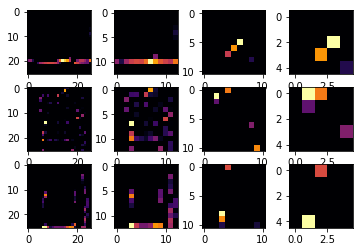

In [11]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(3, 4)
FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26

print("Double check that first, 8th image, and 27th image's label")
print(y_test[FIRST_IMAGE], y_test[SECOND_IMAGE], y_test[THIRD_IMAGE])

CONVOLUTION_NUMBER = 1
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(
    inputs=model.input, 
    outputs=layer_outputs
)
for x in range(0, 4):
  fig1 = activation_model.predict(
      x_test[FIRST_IMAGE].reshape(1, 28, 28, 1)
  )[x]
  axarr[0, x].imshow(
      fig1[0, :, :, CONVOLUTION_NUMBER], 
      cmap='inferno'
  )
  axarr[0, x].grid(False)

  fig2 = activation_model.predict(
      x_test[SECOND_IMAGE].reshape(1, 28, 28, 1)
  )[x]
  axarr[1, x].imshow(
      fig2[0, :, :, CONVOLUTION_NUMBER], 
      cmap='inferno'
  )
  axarr[1, x].grid(False)

  fig3 = activation_model.predict(
      x_test[THIRD_IMAGE].reshape(1, 28, 28, 1)
  )[x]
  axarr[2, x].imshow(
      fig3[0, :, :, CONVOLUTION_NUMBER], 
      cmap='inferno'
  )
  axarr[2, x].grid(False)

plt.show()